<a href="https://colab.research.google.com/github/AlexeyTri/MyMachineLearningSeminars/blob/main/seminar3/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Нейронные сети: AUTOGRAD** 

In [21]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import expit
import numpy as np
import torch

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import LeaveOneOut, KFold, ParameterGrid
from sklearn.metrics import classification_report

from torchvision import datasets
from torchvision import transforms

# Автоматическое дифференцирование

* пример:

\begin{align}
f(x) = x_3⋅\cos(\frac{x_1}{x_2}) ⋅\left(\exp(x_3) + \frac{x_1}{x_2}\right)\\\
\textbf{дифференцирование вперед $x_1$:}\\
\frac{\partial z_1}{\partial x_1} = \frac{1}{x_2}\\
\frac{\partial z_2}{\partial x_1} = 0\\
\frac{\partial z_3}{\partial x_1} = \frac{\partial z_3}{\partial z_1}\frac{\partial z_1}{\partial x_1}=-\sin({\frac{x_1}{x_2}})\frac{1}{x_2}\\
\frac{\partial z_4}{\partial x_1} = \frac{\partial z_4}{\partial z_1}\frac{\partial z_1}{\partial x_1} + \frac{\partial z_4}{\partial z_2}\frac{\partial z_2}{\partial x_1}=\frac{1}{x_2}\\
\frac{\partial z_5}{\partial x_1} =\frac{\partial z_5}{\partial z_3}\frac{\partial z_3}{\partial x_1}⋅\frac{\partial z_5}{\partial z_4}\frac{\partial z_4}{\partial x_1} = -\sin({\frac{x_1}{x_2}})\frac{1}{x_2}\left(\exp(x_3) + \frac{x_1}{x_2}\right) + \cos(\frac{x_1}{x_2})\frac{1}{x_2}\\
\frac{\partial z_6}{\partial x_1} =\frac{\partial z_6}{\partial z_5}\frac{\partial z_5}{\partial x_1}⋅\frac{\partial z_6}{\partial x_3}\frac{\partial x_3}{\partial x_1} =x_3\left( -\sin({\frac{x_1}{x_2}})\frac{1}{x_2}\left(\exp(x_3) + \frac{x_1}{x_2}\right) + \cos(\frac{x_1}{x_2})\frac{1}{x_2}\right)\\
\frac{\partial f}{\partial x_1} = \frac{\partial f}{\partial x_1}\frac{\partial z_6}{\partial x_1}= x_3\left( -\sin({\frac{x_1}{x_2}})\frac{1}{x_2}\left(\exp(x_3) + \frac{x_1}{x_2}\right) + \cos(\frac{x_1}{x_2})\frac{1}{x_2}\right)\\\\\\
\textbf{дифференцирование назад $x_1$:}\\
\frac{\partial f}{\partial z_6} = 1\\
\frac{\partial f}{\partial z_5} = \frac{\partial f}{\partial z_6}\frac{\partial z_6}{\partial z_5} = x_3\\
\frac{\partial f}{\partial z_4} = \frac{\partial f}{\partial z_5}\frac{\partial z_5}{\partial z_4} = x_3\cos(\frac{x_1}{x_2})\\
\frac{\partial f}{\partial z_3} = \frac{\partial f}{\partial z_5}\frac{\partial z_5}{\partial z_3} = x_3\left(\exp(x_3) + \frac{x_1}{x_2}\right)\\
\frac{\partial f}{\partial z_2} = \frac{\partial f}{\partial z_4}\frac{\partial z_4}{\partial z_2} = x_3\cos(\frac{x_1}{x_2})\\
\frac{\partial f}{\partial z_1} = \frac{\partial f}{\partial z_3}\frac{\partial z_3}{\partial z_1} +  \frac{\partial f}{\partial z_4}\frac{\partial z_4}{\partial z_1}= -\sin{\frac{x_1}{x_2}}\left(x_3\left(\exp(x_3) + \frac{x_1}{x_2}\right)\right) + x_3\cos(\frac{x_1}{x_2})\\
\frac{\partial f}{\partial x_1} = \frac{\partial z_1}{\partial z_1}\frac{\partial z_1}{\partial x_1} = \frac{\partial f}{\partial z_3}\frac{\partial z_3}{\partial z_1} +  \frac{\partial f}{\partial z_4}\frac{\partial z_4}{\partial z_1}= \frac{1}{x_2}\left(-\sin{\frac{x_1}{x_2}}\left(x_3\left(\exp(x_3) + \frac{x_1}{x_2}\right)\right) + x_3\cos(\frac{x_1}{x_2})\right)
\end{align} 


* Вывод-?

# Полносвязная NN - PERCEPTRON

в матричном виде
\begin{align}
f(x,W) = W_{n_2+1}σ(...W_2σ(W_1x)...)
\end{align} 

$n$ размерность пространства признаков (input_dim)

$n_1$ размерность скрытого слоя (hidden_dim)

$n_2$ количество скрытых слоев (num_layers)

$n_3$ размерность пространства ответов (output_dim)

! при $n_2 = 0$ получаем линейную регрессию, соответственно она является частным случаем персептрона


In [36]:
MNIST_train = datasets.FashionMNIST('./fasihonmnist', train=True, download=True,
                              transform=transforms.ToTensor())
MNIST_test = datasets.FashionMNIST('./fashionmnist', train=False, download=True, 
                             transform=transforms.ToTensor())

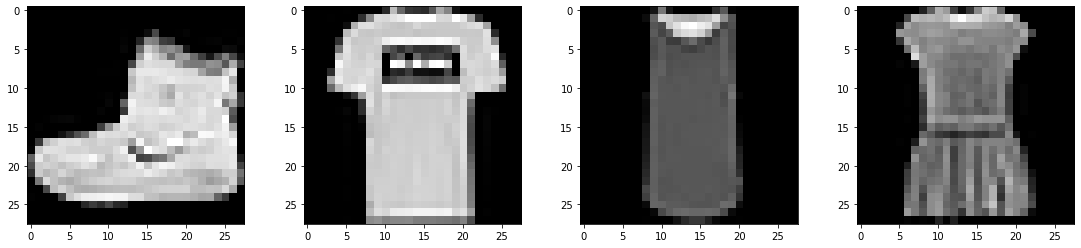

In [38]:
fig, gs = plt.figure(figsize=(19, 4)), gridspec.GridSpec(1,4)

ax = []

for i in range(4):
    ax.append(fig.add_subplot(gs[i]))
    ax[i].imshow(np.array(MNIST_train[i][0][0]), 'gray')

plt.show()

In [24]:
class Perceptron(torch.nn.Module):
    @property
    def device(self):
        for p in self.parameters():
            return p.device
    
    def __init__(self, input_dim=784, num_layers=0,hidden_dim=64, output_dim=10, p=0.0):
        super(Perceptron, self).__init__()
    
        self.layers = torch.nn.Sequential()

        prev_size = input_dim
        for i in range(num_layers):
            self.layers.add_module('layer{}'.format(i), torch.nn.Linear(prev_size, hidden_dim))
            self.layers.add_module('relu{}'.format(i), torch.nn.ReLU())
            self.layers.add_module('dropout{}'.format(i), torch.nn.Dropout(p=p))
            prev_size=hidden_dim

        self.layers.add_module('classifier', torch.nn.Linear(prev_size, output_dim))

    def forward(self, input):
        return self.layers(input)

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # считаем на центарльнгом процессоре
device

device(type='cuda')

In [ ]:
model = Perceptron()
model.to(device)

In [ ]:
model = Perceptron(num_layers=1)
model.to(device)

In [ ]:
model = Perceptron(num_layers=2)
model.to(device)

### саппорт функции: test, train, draw

In [44]:
def testing(model, dataset):
    generator = torch.utils.data.DataLoader(dataset, batch_size=64)

    pred = []
    real = []

    for x, y in generator:
        x = x.view([-1, 784]).to(device)
        y = y.to(device)

        pred.extend(torch.argmax(model(x), dim=-1).cpu().numpy().tolist())
        real.extend(y.cpu().numpy().tolist())
    return np.mean(np.array(real) == np.array(pred)), classification_report(real, pred)

In [45]:
def trainer(model, dataset, loss_function, optimizer, epochs):
    for epoch in tqdm(range(epochs), leave=False):
        generator = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)
    for x, y  in tqdm(generator, leave=False):
        optimizer.zero_grad()
        x = x.view([-1, 784]).to(device)
        y = y.to(device)
        # классификация модели
        output = model(x)
        # расчет функции потерь
        loss = loss_function(output, y)
        # расчет градиента
        loss.backward()
        # w с крышечкой
        optimizer.step()

In [46]:
def draw_table(data, title=['ACCURACY'], width=[60, 11]):    
    row_format = '|' + '|'.join([("{:>"+str(w)+"}") for w in width]) + '|'
    row_format_bet = '+' + '+'.join([("{:>"+str(w)+"}") for w in width]) + '+'
    
    print(row_format_bet.format(
        "-"*width[0], *["-"*width[i+1] for i, _ in enumerate(title)]))
    print(row_format.format("", *title))
    print(row_format_bet.format(
        "-"*width[0], *["-"*width[i+1] for i, _ in enumerate(title)]))
    for key in data:
        if len(key) > width[0]:
            row_name = '...' + key[len(key)-width[0]+3:]
        else:
            row_name = key
        print(row_format.format(row_name, *[round(x, 2) for x in data[key]]))
        print(row_format_bet.format(
            "-"*width[0], *["-"*width[i+1] for i, _ in enumerate(title)]))

In [ ]:
model = Perceptron(num_layers=0)
model.to(device)

In [ ]:
_ = model.eval()
acc, report = testing(model, MNIST_test)
print(report)

In [58]:
_ = model.train()
trainer(model=model, 
        dataset=MNIST_train, 
        loss_function=torch.nn.CrossEntropyLoss(), 
        optimizer=torch.optim.Adam(model.parameters(), lr=0.001), 
        epochs=4)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

In [ ]:
_ = model.eval()
acc, report = testing(model, MNIST_test)
print(report)

## гиперпараметры:



1.   num_layers
2.   hidden_dim
3.   lr
4.   p

CROSS-VALIDATION

In [61]:
cross_val = KFold(3)
number_of_batch = cross_val.get_n_splits(MNIST_train)

grid = ParameterGrid({'num_layers': [0, 2], 
                      'hidden_dim': [8, 64],
                      'p': [0.3, 0.7],
                      'lr': [0.001]})

X_train = MNIST_train.transform(MNIST_train.data.numpy()).transpose(0,1)
Y_train = MNIST_train.targets.data

In [ ]:
scores = dict()
for item in tqdm(grid):
    list_of_scores = []
    for train_index, test_index in tqdm(cross_val.split(X_train), 
                                        total=number_of_batch, leave=False):
        x_train_fold = X_train[train_index]
        x_test_fold = X_train[test_index]
        y_train_fold = Y_train[train_index]
        y_test_fold = Y_train[test_index]

        traindata = torch.utils.data.TensorDataset(x_train_fold, y_train_fold)
        testdata = torch.utils.data.TensorDataset(x_test_fold, y_test_fold)

        model = Perceptron(num_layers=item['num_layers'], p=item['p'],
                           hidden_dim=item['hidden_dim'])
        model.to(device)
        _ = model.train()
        trainer(model=model, 
                dataset=traindata, 
                loss_function=torch.nn.CrossEntropyLoss(), 
                optimizer=torch.optim.Adam(model.parameters(), lr=item['lr']), 
                epochs=4)
        
        _ = model.eval()
        acc, report = testing(model, testdata)
        list_of_scores.append(acc)
    scores[str(item)] = [np.mean(list_of_scores)]

In [63]:
draw_table(scores)

+------------------------------------------------------------+-----------+
|                                                            |   ACCURACY|
+------------------------------------------------------------+-----------+
|   {'hidden_dim': 8, 'lr': 0.001, 'num_layers': 0, 'p': 0.3}|       0.82|
+------------------------------------------------------------+-----------+
|   {'hidden_dim': 8, 'lr': 0.001, 'num_layers': 0, 'p': 0.7}|       0.82|
+------------------------------------------------------------+-----------+
|   {'hidden_dim': 8, 'lr': 0.001, 'num_layers': 2, 'p': 0.3}|        0.6|
+------------------------------------------------------------+-----------+
|   {'hidden_dim': 8, 'lr': 0.001, 'num_layers': 2, 'p': 0.7}|       0.41|
+------------------------------------------------------------+-----------+
|  {'hidden_dim': 64, 'lr': 0.001, 'num_layers': 0, 'p': 0.3}|       0.82|
+------------------------------------------------------------+-----------+
|  {'hidden_dim': 64, 'lr